In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import warnings

# Credit Card Fraud Detection using ML Models
## Detect the anomaly and classify it as a fraudulent transaction as quickly as possible

In [2]:
# Load the dataset from the csv file using pandas
df = pd.read_csv("creditcard.csv")

In [3]:
# Grab a peek at the data
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
###  'V1, V2, … V28' are the principal components obtained with PCA - Transformed for confidentiality reasons
### 'Amount' is the transaction Amount
### 'Class' is the response variable and it takes value 1 in case of fraud and 0 valid.

In [4]:
# Preview Data Types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum().sort_values(ascending=False)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

In [7]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# df contains our target 'Class' column
# where 1 represents fraud and 0 represents valid transactions.
fraud = df[df['Class'] == 1]  # Select rows where 'Class' is 1 (fraudulent transactions)
valid = df[df['Class'] == 0]  # Select rows where 'Class' is 0 (valid transactions)

# Calculate the Fraud vs Valid ratio
outFrac = len(fraud) / float(len(valid))

In [9]:
print(f'Percentage of Fraud Cases: {outFrac * 100:.3f}')  # % of Fraud out of all Transactions
print(f'Fraud Cases: {len(df[df["Class"] == 1])}')  # Count rows where 'Class' is 1 (fraudulent transactions)
print(f'Valid Transactions: {len(df[df["Class"] == 0])}')  # Count rows where 'Class' is 0 (valid transactions)

Percentage of Fraud Cases: 0.173
Fraud Cases: 492
Valid Transactions: 284315


### The data is imbalanced in that only 0.173% of transactions reflect fraud
#### *** We will log model results and then find metrics to correctly construct our model ***

In [10]:
# Print Summary Statistics about the Fraud Transactions
print(f'Details of the fraudulent transactions {fraud.Amount.describe()}')

Details of the fraudulent transactions count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [11]:
# Print Summary Statistics about the Valid Transactions
print(f'Details of the valid transactions {valid.Amount.describe()}')

Details of the valid transactions count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


## Data Visualization
### Visualize the imbalanced data

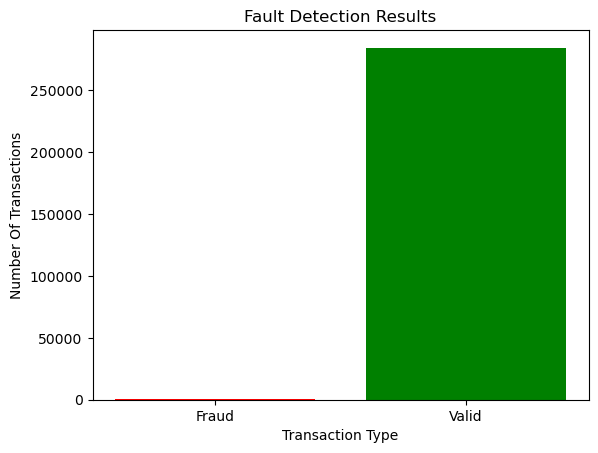

In [12]:
import matplotlib.pyplot as plt

fraud_count = len(fraud)
valid_count = len(valid)

transaction_categories = ['Fraud', 'Valid']
transaction_counts = [fraud_count, valid_count]

plt.bar(transaction_categories, transaction_counts, color=['red', 'green'])
plt.xlabel("Transaction Type")
plt.ylabel("Number Of Transactions")
plt.title("Fault Detection Results")

plt.grid(False)

plt.show()

In [13]:
# Let's set parameters for our ML models

# Remove the 'Class' column from the dataframe : Removing the 'Class' column from the features (X) helps ensure that 
# the target variable doesn't influence the model's predictions
X = df.drop(['Class'], axis=1)

# Get the 'Class' column as a separate dataframe
# The target variable (Y) is kept separate for evaluation and prediction purposes.
Y = df["Class"]

In [14]:
# Print the shape of X and Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [15]:
# Convert X and Y dataframes to numpy arrays
xData = X.values
yData = Y.values

## Model Prep

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
yData = testLabels = df.Class.astype(np.float32)
# Split the data into training and testing sets
# 25% TESTING (test size) : 75% TRAINING
# Use random state value 42 to keep train-test split the same
# stratify=yData ensures that the class distribution is preserved in both the training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.25, random_state=42, stratify=yData)

In [18]:
yTrain.value_counts()

0.0    213236
1.0       369
Name: Class, dtype: int64

In [19]:
yData.value_counts()

0.0    284315
1.0       492
Name: Class, dtype: int64

In [20]:
yTest.value_counts()

0.0    71079
1.0      123
Name: Class, dtype: int64

In [21]:
xTrain.shape

(213605, 30)

In [22]:
xTest.shape

(71202, 30)

## Model Evaluation

In [23]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn import metrics

## Logistic Regression

In [24]:
# Create an instance of Logistic Regression with specified parameters
logreg=LR(solver='lbfgs', max_iter=400)
logreg.fit(xData,yData)
y_logreg=logreg.predict(xTest)
y_logreg_prob=logreg.predict_proba(xTest)[:,1]

### Performance metrics evaluation

In [25]:
print("Confusion Matrix:\n",metrics.confusion_matrix(yTest,y_logreg))
print("Balanced Accuracy:\n",metrics.balanced_accuracy_score(yTest,y_logreg))
print("F1:\n",metrics.f1_score(yTest,y_logreg))
print("Precision:\n",metrics.precision_score(yTest,y_logreg))
print("Recall:\n",metrics.recall_score(yTest,y_logreg))
print("AUC:\n",metrics.roc_auc_score(yTest,y_logreg_prob))

# Balanced Accuracy is the average accuracy for each class - Works best with imbalanced data - sensitivity and specificity of the classifier

# F1 - Balance between Precision and Recall

# TP | FP
# FN | TN

Confusion Matrix:
 [[71062    17]
 [   48    75]]
Balanced Accuracy:
 0.8047584635302732
F1:
 0.6976744186046511
Precision:
 0.8152173913043478
Recall:
 0.6097560975609756
AUC:
 0.9343378036827681


### ROC Curve

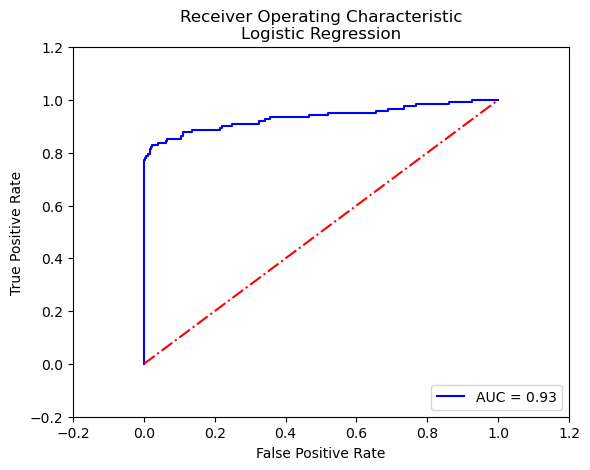

In [26]:
auc=metrics.roc_auc_score(yTest,y_logreg_prob)

fpr,tpr,thresholds=metrics.roc_curve(yTest,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest 

In [27]:
# from sklearn.ensemble import RandomForestClassifier

In [28]:
# # # Building the Random Forest Classifier (RANDOM FOREST)
# # # define the RFclassifier()
# rfc = RandomForestClassifier()

# # use .fit to select training data
# rfc.fit(xTrain, yTrain)

# # use .predict to test independent (x) test data to predict (y)
# yPred = rfc.predict(xTest)

In [29]:
# # # Evaluating the classifier
# n_outliers = len(fraud)  # Count of fraud transactions
# n_errors = (yPred != yTest).sum()  # Number of instances predicted values do not match target values

### Performance metrics evaluation

In [30]:
# # printing every score of the classifier
# print("The model used is Random Forest classifier")

# #Performance metrics evaluation
# print("Confusion Matrix:\n",metrics.confusion_matrix(yTest,yPred))
# print("Balanced Accuracy:\n",metrics.balanced_accuracy_score(yTest,yPred))
# print("F1:\n",metrics.f1_score(yTest,yPred))
# print("Precision:\n",metrics.precision_score(yTest,yPred))
# print("Recall:\n",metrics.recall_score(yTest,yPred))
# print("AUC:\n",metrics.roc_auc_score(yTest,yPred))

### ROC Curve

In [31]:
# auc=metrics.roc_auc_score(yTest,yPred)

# fpr,tpr,thresholds=metrics.roc_curve(yTest,yPred)
# plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
# plt.plot([0,1],[0,1],'r-.')
# plt.xlim([-0.2,1.2])
# plt.ylim([-0.2,1.2])
# plt.title('Receiver Operating Characteristic\nLogistic Regression')
# plt.legend(loc='lower right')
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

### Use SMOTE (Synthetic Minority Oversampling Technique)

We want to analyze if the data augmentation technique will benefit our model's predictiveness.

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
X = df.drop('Class',axis='columns')
y = df['Class']

In [34]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(xData, yData)

y_sm.value_counts()

0.0    284315
1.0    284315
Name: Class, dtype: int64

In [36]:
xTrain, xTest, yTrain, yTest = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42, stratify=y_sm)

In [37]:
# # Number of classes in training Data
yTrain.value_counts()

0.0    213236
1.0    213236
Name: Class, dtype: int64

In [38]:
# Logistic Regression
logreg=LR(solver='lbfgs', max_iter=400)

logreg.fit(X_sm,y_sm)

y_logreg=logreg.predict(xTest)
y_logreg_prob=logreg.predict_proba(xTest)[:,1]

In [39]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(yTest,y_logreg))
print("Balanced Accuracy:\n",metrics.balanced_accuracy_score(yTest,y_logreg))
print("F1:\n",metrics.f1_score(yTest,y_logreg))
print("Precision:\n",metrics.precision_score(yTest,y_logreg))
print("Recall:\n",metrics.recall_score(yTest,y_logreg))
print("AUC:\n",metrics.roc_auc_score(yTest,y_logreg_prob))

# TP | FP
# FN | TN

Confusion Matrix:
 [[70209   870]
 [ 2270 68809]]
Balanced Accuracy:
 0.9779119008427243
F1:
 0.977692209323804
Precision:
 0.9875141721322063
Recall:
 0.968063703766232
AUC:
 0.9966833493129585


### Plot ROC Curve

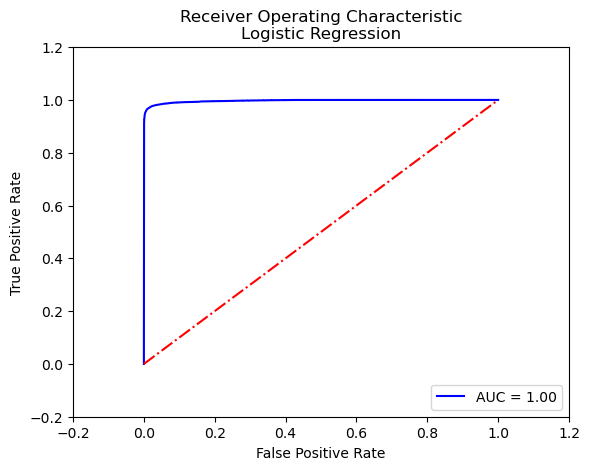

In [40]:
auc=metrics.roc_auc_score(yTest,y_logreg_prob)

fpr,tpr,thresholds=metrics.roc_curve(yTest,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Undersampling - Reduce skew/bias in models 

In [41]:
# Class count
count_class_0, count_class_1 = df.Class.value_counts()

# Divide by class
df_class_0 = df[df['Class'] == 0]
df_class_1 = df[df['Class'] == 1]

In [42]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())

Random under-sampling:
0    492
1    492
Name: Class, dtype: int64


In [43]:
xData = df_test_under.drop('Class',axis='columns')
yData = df_test_under['Class']

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size=0.25, random_state=42, stratify=yData)

In [44]:
# Number of classes in training Data
yTrain.value_counts()

1    369
0    369
Name: Class, dtype: int64

In [45]:
#Logistic Regression
logreg=LR(solver='lbfgs', max_iter=100)

logreg.fit(xData,yData)

y_logreg=logreg.predict(xTest)
y_logreg_prob=logreg.predict_proba(xTest)[:,1]

In [46]:
#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(yTest,y_logreg))
print("Balanced Accuracy:\n",metrics.balanced_accuracy_score(yTest,y_logreg))
print("F1:\n",metrics.f1_score(yTest,y_logreg))
print("Precision:\n",metrics.precision_score(yTest,y_logreg))
print("Recall:\n",metrics.recall_score(yTest,y_logreg))
print("AUC:\n",metrics.roc_auc_score(yTest,y_logreg_prob))

# TP | FP
# FN | TN

Confusion Matrix:
 [[119   4]
 [ 10 113]]
Balanced Accuracy:
 0.943089430894309
F1:
 0.9416666666666668
Precision:
 0.9658119658119658
Recall:
 0.9186991869918699
AUC:
 0.9746843809901513


### Plot ROC Curve

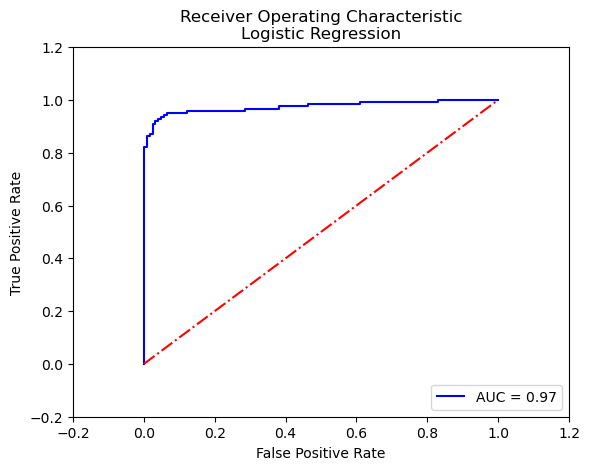

In [47]:
auc=metrics.roc_auc_score(yTest,y_logreg_prob)

fpr,tpr,thresholds=metrics.roc_curve(yTest,y_logreg_prob)
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% auc)
plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nLogistic Regression')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Model Results

### LR Model - No Data Augmentation 

##### Confusion Matrix:
 [[71062    17]
 
 [   48    75]]
##### Balanced Accuracy:
 0.8047584635302732
##### F1:
 0.6976744186046511
##### Precision:
 0.8152173913043478
##### Recall:
 0.6097560975609756
##### AUC:
 0.9343378036827681

### LR Model - SMOTE

##### Confusion Matrix:
 [[70209   870]
 
 [ 2270 68809]]
##### Balanced Accuracy:
 0.9779119008427243
##### F1:
 0.977692209323804
##### Precision:
 0.9875141721322063
##### Recall:
 0.968063703766232
##### AUC:
 0.9966833493129585

### LR Model - UNDERSAMPLING

##### Confusion Matrix:
 [[119   4]
 
  [ 10 113]]
##### Balanced Accuracy:
 0.943089430894309
##### F1:
 0.9416666666666668
##### Precision:
 0.9658119658119658
##### Recall:
 0.9186991869918699
##### AUC:
 0.9746843809901513

# RESULTS

## Using different resampling techniques, we positively impacted model performance. The data provided above leads me to believe that the model is performing better with balanced data. We effectively raised F1 and Balanced Accuracy scores through data augmentation to aid model performance. 